In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Build By Rohit Kumar [kr1998rohik@gmail.com]

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
sns.set_style('darkgrid')

# Silhouette analysis
from sklearn.metrics import silhouette_score

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# for scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xlrd


In [5]:
df = pd.read_excel('/kaggle/input/online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx')

# looking at top 5 rows 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic Cleaning 


In [11]:
# count of duplicated rows in data 
df.duplicated().sum()

5268

In [12]:
# removing the duplicate rows 
df = df[-df.duplicated()]
df.shape


(536641, 8)

In [13]:
# these are the transaction that have negative quantity which indicate the returned or cancelled orders
df[df['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [15]:
# removing all the invoice number who starts with 'C' as they are returned orders
df = df[df['InvoiceNo'].str.startswith('C')!=True]
df.shape


(527390, 8)

In [16]:
# checking the number of unique tranaction 
# through there are more than 5 lakh entries but the number of transaction happened is 21892
df.InvoiceNo.nunique()

22064

In [18]:
# checking the unique stock ids in the data or number of unique items sold bu the retailer 
df.StockCode.nunique()

4059

In [19]:
# top 10 stock ids that sold the most 
df.StockCode.value_counts().head(10)


StockCode
85123A    2259
85099B    2112
22423     2012
47566     1700
20725     1582
84879     1477
22197     1418
22720     1396
21212     1352
22383     1307
Name: count, dtype: int64

In [20]:
# looking at the distribution of the quantity we see that there is a negative value which might indicate return orders 
df.Quantity.describe()

count    527390.000000
mean         10.311272
std         160.367285
min       -9600.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [21]:
# looking at the data where quantity is negative and possible explanation is these are return orders or cancelled order
df[df['Quantity']<0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [22]:
# keeping only those transaction that have successfull ordered 
df = df[df['Quantity']>=0]
df.shape

(526054, 8)

In [23]:
print('The maximum date us:',df.InvoiceDate.min())
print('The maximum date is:',df.InvoiceDate.max())

The maximum date us: 2010-12-01 08:26:00
The maximum date is: 2011-12-09 12:50:00


In [24]:
# checking the distribution of unit price
df.UnitPrice.describe(percentiles=[0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    526054.000000
mean          3.871747
std          42.016560
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
85%           5.790000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

In [26]:
# we see that more than 90% have country as UK which is obvious as the retailer is UK based 
df.Country.value_counts(normalize=True)

Country
United Kingdom          0.914627
Germany                 0.017160
France                  0.015955
EIRE                    0.014985
Spain                   0.004714
Netherlands             0.004492
Belgium                 0.003861
Switzerland             0.003724
Portugal                0.002836
Australia               0.002251
Norway                  0.002038
Italy                   0.001441
Channel Islands         0.001420
Finland                 0.001302
Cyprus                  0.001146
Sweden                  0.000855
Unspecified             0.000840
Austria                 0.000757
Denmark                 0.000722
Poland                  0.000627
Japan                   0.000610
Israel                  0.000555
Hong Kong               0.000532
Singapore               0.000422
Iceland                 0.000346
USA                     0.000340
Canada                  0.000287
Greece                  0.000276
Malta                   0.000213
United Arab Emirates    0.000129
Eu

In [27]:
# putting UK as one country and combine rest countres inot one category
df['Country'] = df['Country'].apply(lambda x: 'United Kigdom' if x=='United Kingdom' else 'Others')
df.Country.value_counts(normalize=True)

Country
United Kigdom    0.914627
Others           0.085373
Name: proportion, dtype: float64

In [28]:
# checking the number of unique item list 
df.Description.nunique()

4077

In [29]:
# top 10 item sold 
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: count, dtype: int64

In [30]:
# there are cases where the description contains some code/name which are in not directly
# referes to sales
# checking the data where descriptiom  = ? and it is noted that customerid is NaN and unit price is 0
df[df['Description'].str.startswith('?')==True]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38261,539494,21479,?,752,2010-12-20 10:36:00,0.0,NaN,United Kigdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.0,NaN,United Kigdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.0,NaN,United Kigdom
282882,561665,22171,?,142,2011-07-28 16:55:00,0.0,NaN,United Kigdom
323315,565288,23135,?,101,2011-09-02 11:43:00,0.0,NaN,United Kigdom
421093,572920,72803A,?,117,2011-10-26 16:52:00,0.0,NaN,United Kigdom


In [31]:
# removing all the above entries 
df = df[df['Description'].str.startswith('?')!=True]
df.shape


(526048, 8)

In [32]:
# checking the data where description  = *and it is noted that customerid is NaN*

df[df['Description'].str.startswith('*')==True]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20749,538071,21120,*Boombox Ipod Classic,1,2010-12-09 14:09:00,16.98,NaN,United Kigdom
35675,539437,20954,*USB Office Mirror Ball,1,2010-12-17 14:54:00,8.47,NaN,United Kigdom
37095,539453,20954,*USB Office Mirror Ball,1,2010-12-17 17:08:00,8.47,NaN,United Kigdom


In [34]:
# replacing with appropriate name
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [35]:
# Description have actual entries in uppercase words and those who don't have are some of the noises in the dataset
df[df['Description'].str.islower()==True]['Description'].value_counts()


Description
check                                  39
found                                  25
adjustment                             14
amazon                                  8
had been put aside                      5
dotcom                                  4
mailout                                 3
taig adjust                             2
returned                                2
test                                    2
wrongly marked 23343                    1
michel oops                             1
wrongly coded 20713                     1
wrongly marked                          1
wrongly coded 23343                     1
damaged                                 1
amazon adjust                           1
dotcomstock                             1
dotcom adjust                           1
website fixed                           1
allocate stock for dotcom orders ta     1
found box                               1
for online retail orders                1
add stock to allocate 

In [36]:
# removing all the above noises 
df =  df[df['Description'].str.islower()!=True]
df.shape

(525920, 8)

In [38]:
# description have actual entries in the uppercase words and those who dont have are some of the nouises in the data set 
df[df['Description'].str.istitle()==True]['Description'].value_counts()

Description
Manual                                 323
Next Day Carriage                       79
Bank Charges                            12
Dotcomgiftshop Gift Voucher £20.00       9
Found                                    8
Dotcomgiftshop Gift Voucher £10.00       8
Dotcomgiftshop Gift Voucher £30.00       7
Amazon                                   7
Dotcomgiftshop Gift Voucher £50.00       4
Dotcomgiftshop Gift Voucher £40.00       3
High Resolution Image                    3
Adjustment                               2
Dotcomgiftshop Gift Voucher £100.00      1
Amazon Adjustment                        1
John Lewis                               1
Name: count, dtype: int64

In [39]:
# remove all the above listed noises 
df = df[df['Description'].str.istitle()!=True]
df.shape

(525452, 8)

In [43]:
df['Description'] = df['Description'].str.strip()


In [45]:
# count of the unique customer 
df.CustomerID.nunique()

4335

In [46]:
# checking where customer id is null 
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kigdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kigdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kigdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kigdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kigdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kigdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kigdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kigdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kigdom


In [47]:
# removing entries where the customer id is null 
df = df[-df.CustomerID.isnull()]
df.shape


(392353, 8)

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392353 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392353 non-null  object        
 1   StockCode    392353 non-null  object        
 2   Description  392353 non-null  object        
 3   Quantity     392353 non-null  int64         
 4   InvoiceDate  392353 non-null  datetime64[ns]
 5   UnitPrice    392353 non-null  float64       
 6   CustomerID   392353 non-null  float64       
 7   Country      392353 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [49]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [51]:
# chcking random 5 rows from the data 
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
252201,559091,21931,JUMBO STORAGE BAG SUKI,18,2011-07-06 10:47:00,2.08,17905.0,United Kigdom
179516,552278,22683,FRENCH BLUE METAL DOOR SIGN 8,1,2011-05-08 12:36:00,1.25,15059.0,United Kigdom
103585,545071,85036A,GARDENIA 1 WICK MORRIS BOXED CANDLE,1,2011-02-27 15:59:00,4.25,15996.0,United Kigdom
497634,578433,22727,ALARM CLOCK BAKELIKE RED,12,2011-11-24 12:21:00,3.75,17671.0,United Kigdom
187092,552949,22291,HANGING CHICK CREAM DECORATION,5,2011-05-12 12:01:00,1.45,16033.0,United Kigdom
229578,557064,35965,FOLKART HEART NAPKIN RINGS,2,2011-06-16 15:07:00,0.79,13263.0,United Kigdom
266805,560271,20977,36 PENCILS TUBE WOODLAND,2,2011-07-17 14:51:00,1.25,16474.0,United Kigdom
146060,548968,22192,BLUE DINER WALL CLOCK,6,2011-04-05 10:58:00,8.50,12744.0,Others
204414,554663,22456,NATURAL SLATE CHALKBOARD LARGE,1,2011-05-25 14:29:00,4.95,14985.0,United Kigdom
462696,575985,21745,GAOLERS KEYS DECORATIVE GARDEN,1,2011-11-13 14:09:00,3.75,17841.0,United Kigdom


In [54]:
# EDA creating some column for exploratory

df['Amount'] = df['Quantity']*df['UnitPrice']
df['year'] =df['InvoiceDate'].dt.year
df['month'] =df['InvoiceDate'].dt.month
df['day'] =df['InvoiceDate'].dt.day
df['hour'] =df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kigdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kigdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kigdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kigdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kigdom,20.34,2010,12,1,8,2


ValueError: min() arg is an empty sequence

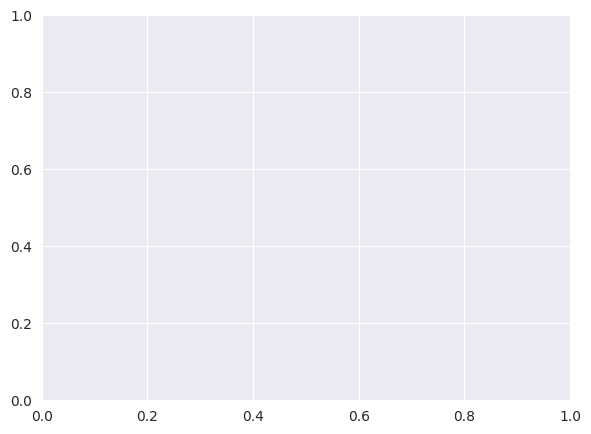

In [62]:
column = ['InvoiceNo','Amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df[df['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()


ValueError: min() arg is an empty sequence

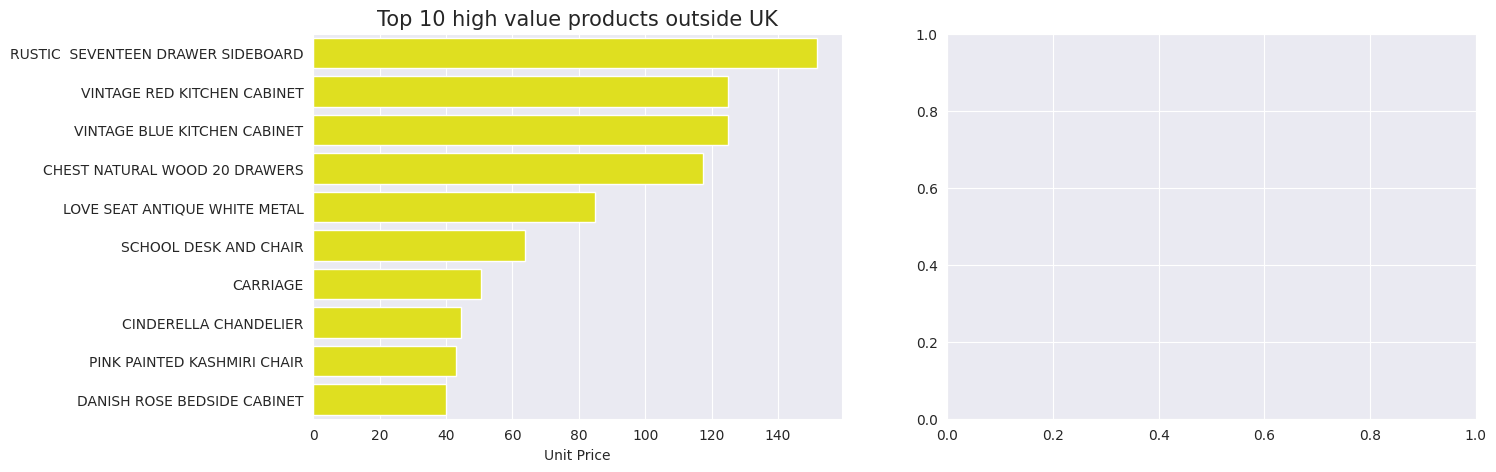

In [63]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = df[df['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)
        
plt.tight_layout()
plt.show()

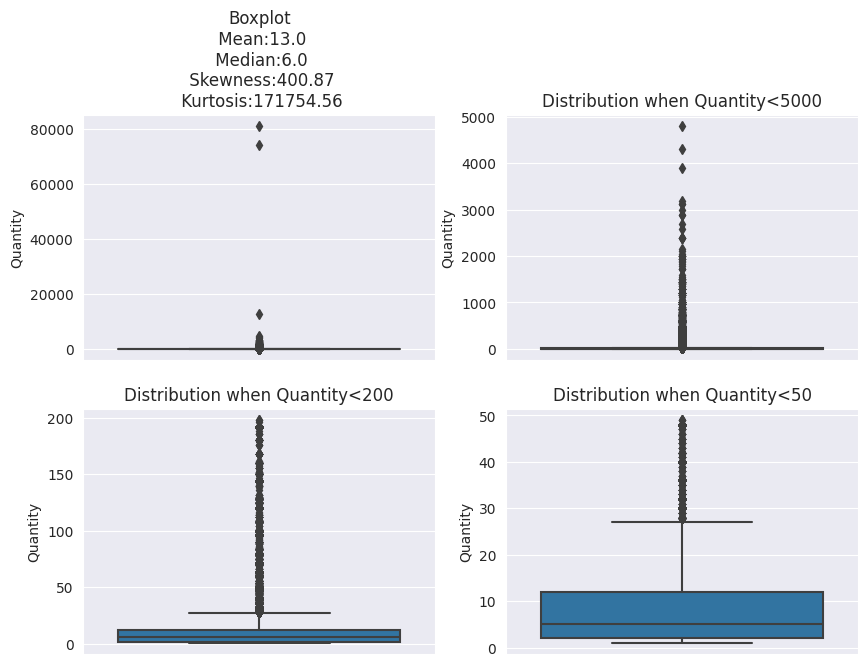

In [64]:
# Looking the distribution of column Quantity
plt.figure(figsize=(10,7))

skewness = round(df.Quantity.skew(),2)
kurtosis = round(df.Quantity.kurtosis(),2)
mean = round(np.mean(df.Quantity),0)
median = np.median(df.Quantity)

plt.subplot(2,2,1)
sns.boxplot(y=df.Quantity)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.Quantity<5000]['Quantity'])
plt.title('Distribution when Quantity<5000')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.Quantity<200]['Quantity'])
plt.title('Distribution when Quantity<200')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.Quantity<50]['Quantity'])
plt.title('Distribution when Quantity<50')

plt.show()

In [66]:
# removing the expectional case where quantity > 70000
df = df[df['Quantity']<70000]

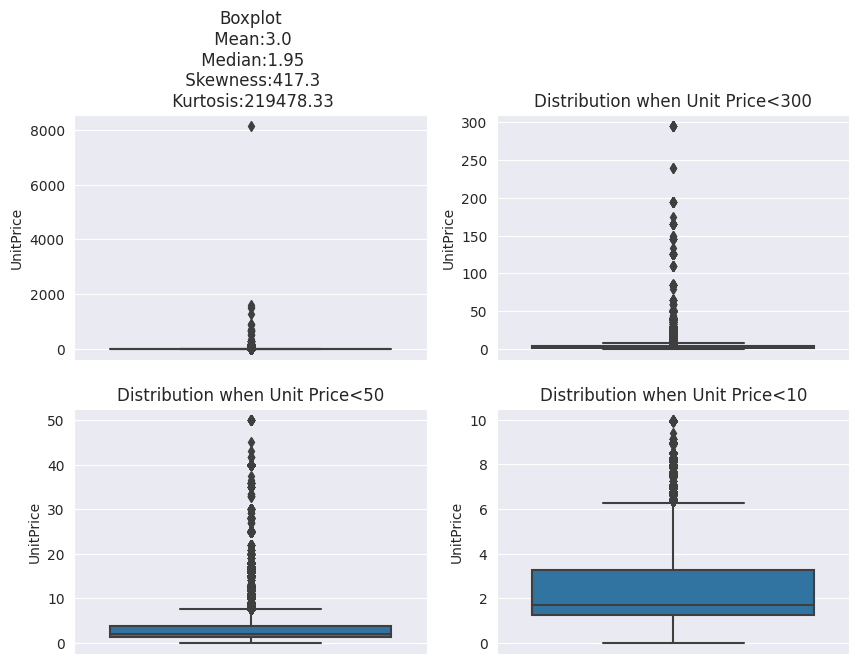

In [67]:
# Looking the distribution of column Unit Price
plt.figure(figsize=(10,7))

skewness = round(df.UnitPrice.skew(),2)
kurtosis = round(df.UnitPrice.kurtosis(),2)
mean = round(np.mean(df.UnitPrice),0)
median = np.median(df.UnitPrice)

plt.subplot(2,2,1)
sns.boxplot(y=df.UnitPrice)
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(2,2,2)
sns.boxplot(y=df[df.UnitPrice<300]['UnitPrice'])
plt.title('Distribution when Unit Price<300')

plt.subplot(2,2,3)
sns.boxplot(y=df[df.UnitPrice<50]['UnitPrice'])
plt.title('Distribution when Unit Price<50')

plt.subplot(2,2,4)
sns.boxplot(y=df[df.UnitPrice<10]['UnitPrice'])
plt.title('Distribution when Unit Price<10')

plt.show()

ValueError: min() arg is an empty sequence

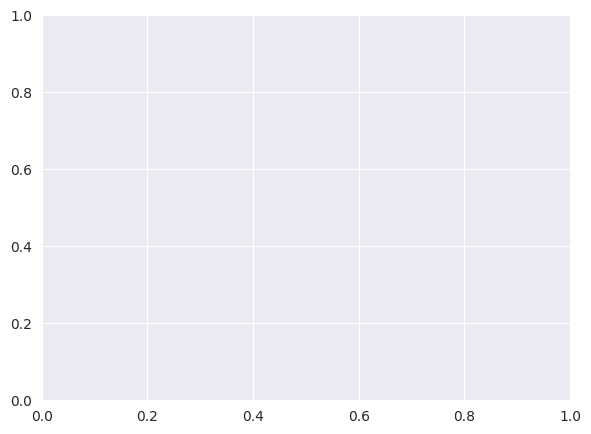

In [68]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

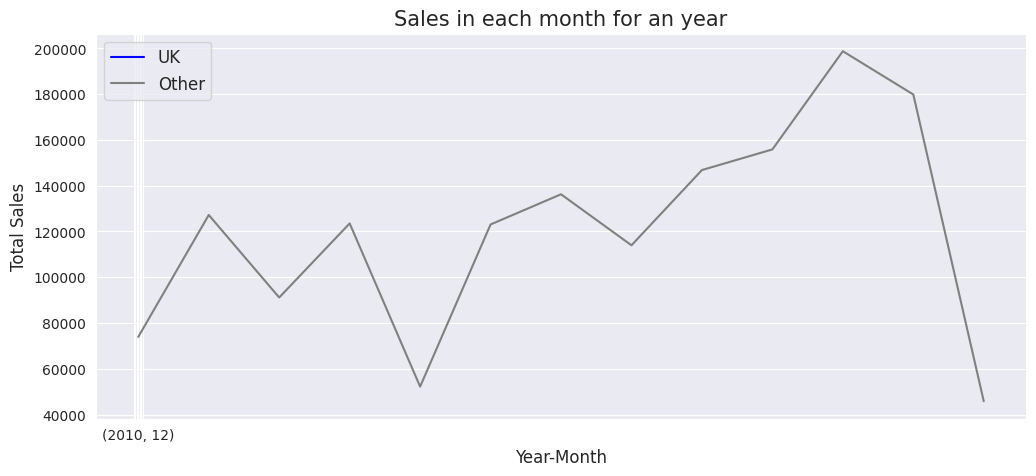

In [69]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['year','month'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

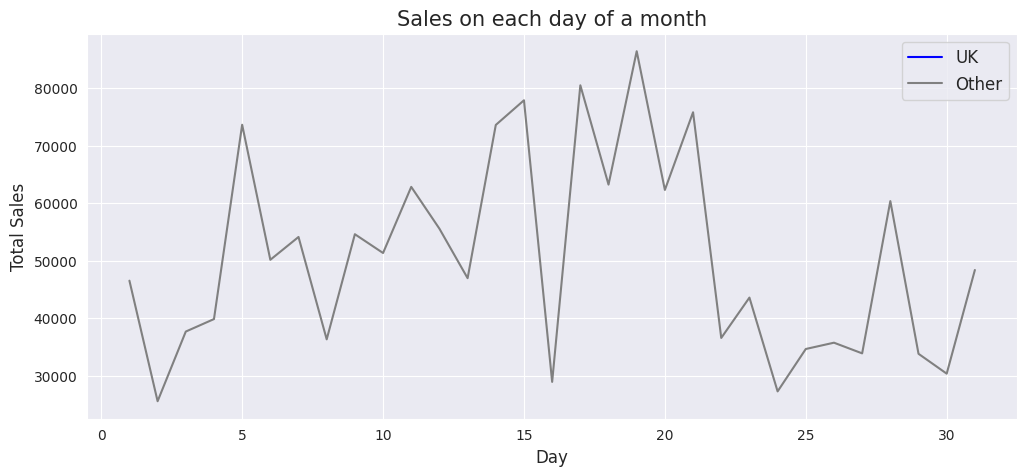

In [70]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['day'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['day'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()


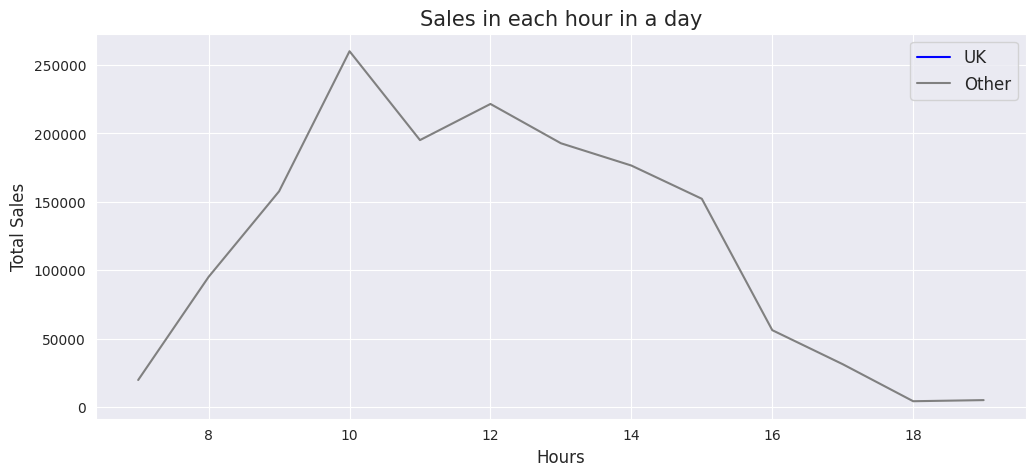

In [71]:
plt.figure(figsize=(12,5))
df[df['Country']=='United Kingdom'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='UK',color='blue')
df[df['Country']=='Others'].groupby(['hour'])['Amount'].sum().plot(kind='line',label='Other',color='grey')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

# cohort analysis 